In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler

In [19]:
df=pd.read_csv('./titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Handling missing and categorical value

In [21]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [39]:
df=df.select_dtypes(include=['float64','int64'])
df

NameError: name 'Parch' is not defined

## Feature Scaling

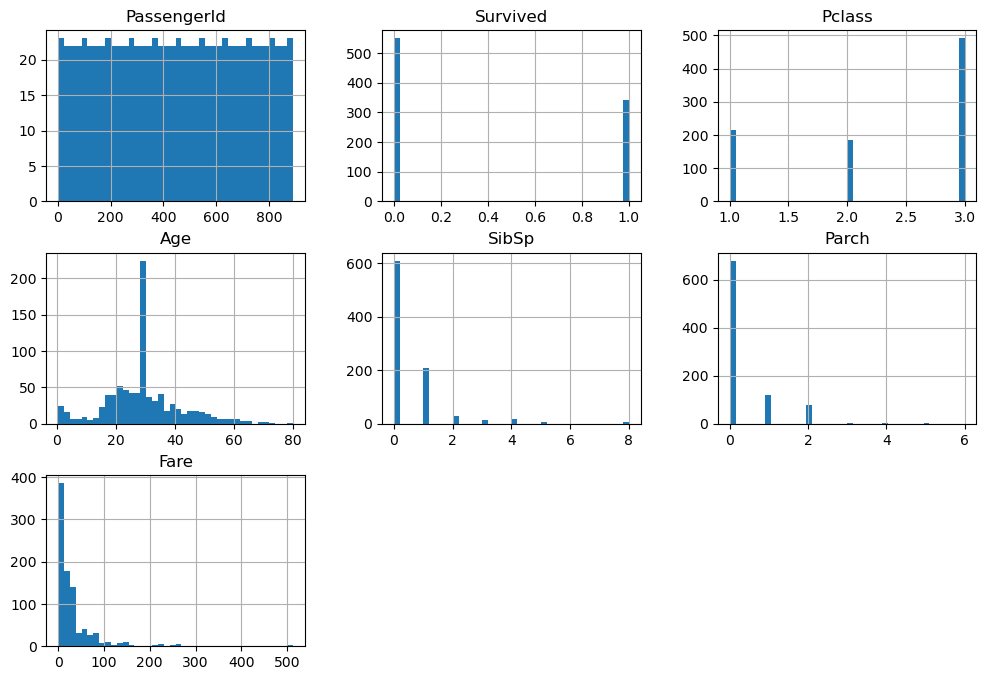

In [24]:
df.hist(bins=40,figsize=(12,8))
plt.show()

<AxesSubplot: >

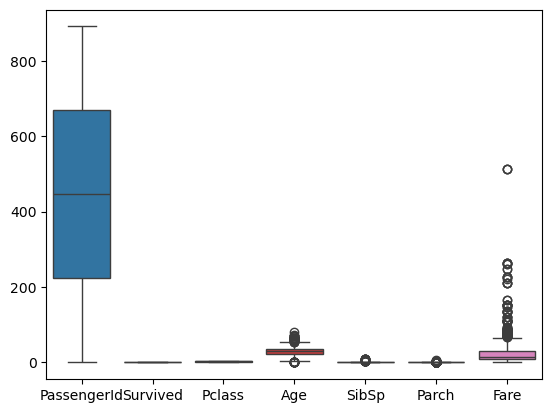

In [25]:
sns.boxplot(df)

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,1.718444,1.266990,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,1.722332,-0.789272,0.827377,0.000000,0.432793,2.008933,-0.176263
889,1.726220,1.266990,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
df=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-5.924806e-01,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,6.387890e-01,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-2.846632e-01,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,4.079260e-01,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,4.079260e-01,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-2.077088e-01,-0.474545,-0.473674,-0.386671
887,1.718444,1.266990,-1.566107,-8.233437e-01,-0.474545,-0.473674,-0.044381
888,1.722332,-0.789272,0.827377,-2.232906e-16,0.432793,2.008933,-0.176263
889,1.726220,1.266990,-1.566107,-2.846632e-01,-0.474545,-0.473674,-0.044381


<AxesSubplot: >

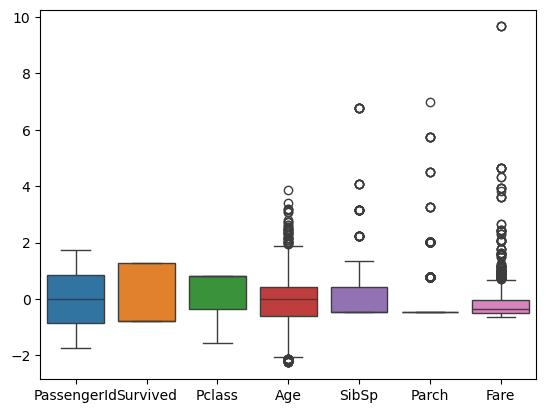

In [28]:
sns.boxplot(df)

## Removing outliers

### I added my factor to the outlier removing function,since there were still many outliers after using normal algorithm

In [36]:
def outlier_remover(aa,ab,fa,fb,sa,sb,pa,pb,df):
    new_df=df[(df['Age']>aa)&(df['Age']<ab)&(df['Fare']>fa)&(df['Fare']<fb)&(df['SibSp']>sa)&(df['SibSp']<sb&(df['Parch']>pa)&(df['Parch']<pb))]
    return new_df

In [37]:
#range=[Q1−1.5⋅IQR,Q3+1.5⋅IQR]



q1=df[['Age','Fare','SibSp']].quantile(0.25)
q3=df[['Age','Fare','SibSp']].quantile(0.75)

Age_a=q1.Age-1.5*(q3.Age-q1.Age)
Age_b=q3.Age+1.5*(q3.Age-q1.Age)

fare_a=q1.Fare-1.5*(q3.Fare-q1.Fare)
fare_b=q3.Fare+1.5*(q3.Fare-q1.Fare)

sib_a=q1.SibSp-1.5*(q3.SibSp-q1.SibSp)
sib_b=q3.SibSp+1.5*(q3.SibSp-q1.SibSp)

parch_a=q1.Parch-1.5*(q3.Parch-q1.Parch)
parch_b=q3.Parch+1.5*(q3.Parch-q1.Parch)

df2=outlier_remover(Age_a,Age_b,fare_a,fare_b,sib_a,sib_b,parch_a,parch_b,df)
df2


AttributeError: 'Series' object has no attribute 'Parch'

<AxesSubplot: >

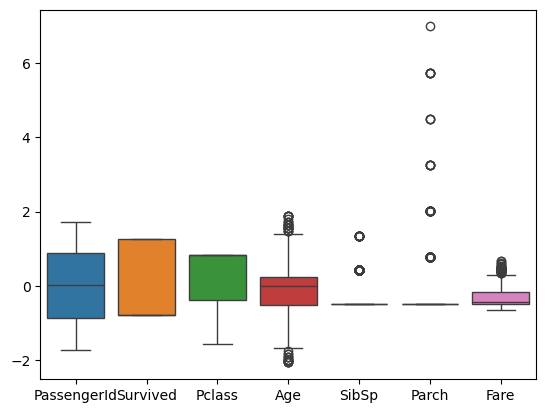

In [31]:
sns.boxplot(df2)

In [33]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,-0.789272,0.827377,-5.924806e-01,0.432793,-0.473674,-0.502445
1,-1.726220,1.266990,-1.566107,6.387890e-01,0.432793,-0.473674,0.786845
2,-1.722332,1.266990,0.827377,-2.846632e-01,-0.474545,-0.473674,-0.488854
3,-1.718444,1.266990,-1.566107,4.079260e-01,0.432793,-0.473674,0.420730
4,-1.714556,-0.789272,0.827377,4.079260e-01,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-2.077088e-01,-0.474545,-0.473674,-0.386671
887,1.718444,1.266990,-1.566107,-8.233437e-01,-0.474545,-0.473674,-0.044381
888,1.722332,-0.789272,0.827377,-2.232906e-16,0.432793,2.008933,-0.176263
889,1.726220,1.266990,-1.566107,-2.846632e-01,-0.474545,-0.473674,-0.044381
